In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('hotel_booking.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


# Stage 2

[Stage 2] Final Project DS 23

Periode : 15 - 21 Agustus

Halo teman-teman! Setelah menemukan insight, dan visualiasi dari dataset yang dipilih, kini saatnya teman-teman masuk ke dalam proses Data Pre-Processing untuk menentukan :
1. Apakah sudah melakukan pengecekkan data bermasalah seperti missing values, invalid values, atau data duplicate dan sudah membersihkannya?
2. Apakah sudah menentukan feature apa saja yang akan digunakan, atau perlu ditambahkan, dan reformatting feature sesuai dengan kebutuhan?

Penting! Saat memanipulasi data, mohon dilakukan dengan alasan yang jelas, dan tidak melakukan penambahan feature baru tapi tidak ada alasan yang mendasari langkah tersebut diperlukan.

Silahkan selesaikan dan kumpulkan dokumen Stage 2 tersebut (Notulen Mentoring, Source Code, Laporan Project) ke link gdrive yang sudah disiapkan (akan diinfokan secara personal ke masing-masing tim), paling lambat tanggal 21 Agustus 2022 pukul 23:59

# Ari

1. arrival_date_week_number >> hapus
2. adults
3. is_repeated_guest
4. previous_cancellations >> 1 atau 0
5. previous_bookings_not_canceled >> hapus
6. reserved_room_type >> fitur baru perbandingan kamar
7. assigned_room_type >> fitur baru perbandingan kamar
8. agent >> hapus
9. company >> hapus
10. reservation_status >> hapus
11. reservation_status_date >> hapus
12. name >> hapus
13. email >> hapus 
14. phone-number >> hapus
15. credit_card >> hapus

## Kolom `arrival_date_week_number`

In [6]:
df.arrival_date_week_number.describe()

count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

<AxesSubplot:xlabel='arrival_date_week_number', ylabel='Count'>

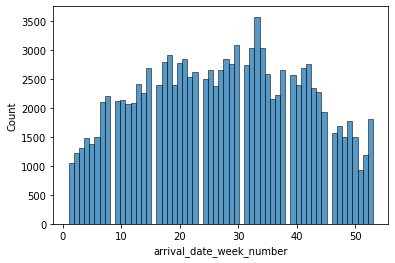

In [7]:
sns.histplot(x='arrival_date_week_number', data=df)

In [8]:
df.arrival_date_week_number.unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26], dtype=int64)

Kolom `arrival_date_week_number` akan dihapus karena tidak terpakai


In [9]:
df_clean = df.drop('arrival_date_week_number', axis=1)
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## Kolom `adults`

In [10]:
df.adults.value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [20]:
df.adults.describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

<AxesSubplot:xlabel='adults'>

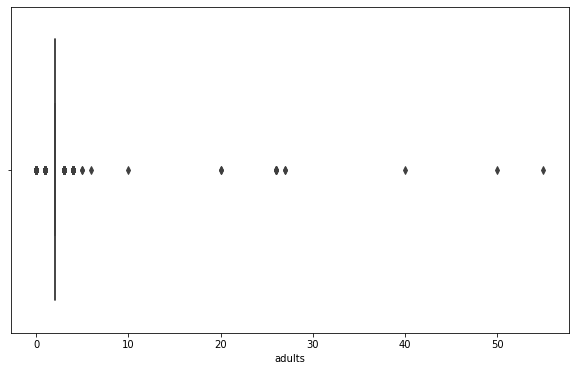

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='adults', data=df)

In [21]:
# Q1
adults_q1 = df.adults.quantile(0.25)
print(adults_q1)
# Q3
adults_q3 = df.adults.quantile(0.75)
print(adults_q3)
# IQR
adults_iqr = adults_q3 - adults_q1
print(adults_iqr)

2.0
2.0
0.0


In [24]:
adults_border_high = adults_q3 + (adults_iqr * 1.5)
print(adults_border_high)
adults_border_low = adults_q1 - (adults_iqr * 1.5)
print((adults_border_low))

2.0
2.0


Mau dikelompokkin jadi single, couple, grup atau dihapus outlier (lebih/kurang dari 2 akan dihapus)

## Kolom `is_repeated_guest`

In [22]:
df.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

Terlihat imbalance

## Kolom `previous_cancellations`

## Kolom `previous_bookings_not_canceled`

## Kolom `reserved_room_type`

## Kolom `assigned_room_type`

## Kolom `agent`

## Kolom `company`

## Kolom `reservation_status`

hapus

## Kolom `reservation_status_date`

hapus

## Kolom `name`

Dihapus saja

## Kolom `email`

Dihapus saja

## Kolom `phone-number`

Dihapus saja

## Kolom `credit_card`

Dihapus saja